# Exploratory Data Analysis (EDA)
This notebook contains comprehensive analysis of the customer churn dataset.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r'C:\Users\saife\OneDrive\Desktop\Graduation\data\processed\data_after_preprocessing.csv')


## 1. Distribution Analysis

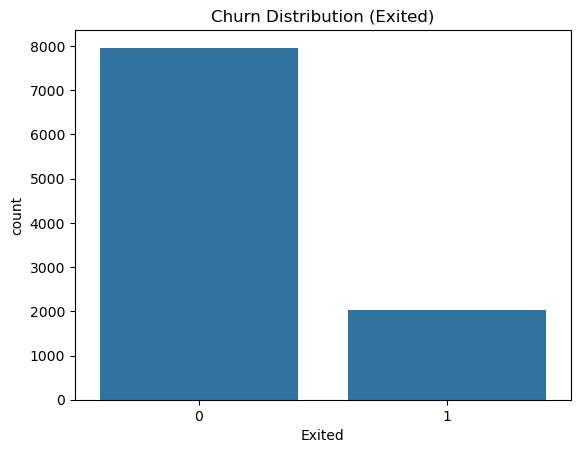

In [8]:
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution (Exited)")
plt.show()

**Interpretations of Previous Visualizations:**

1. **Churn Distribution:**
   - Shows clear class imbalance in original dataset
   - Approximately 20% churn rate, indicating customer retention challenges

In [9]:
print(df['Exited'].value_counts(normalize=True))


Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64


## 2. Demographic Analysis

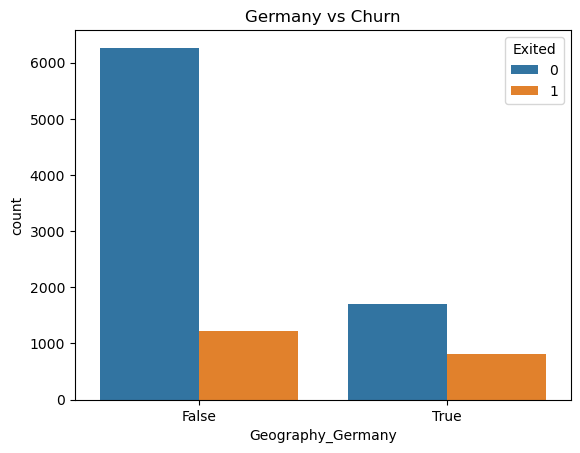

In [10]:
sns.countplot(x='Geography_Germany', hue='Exited', data=df)
plt.title("Germany vs Churn")
plt.show()


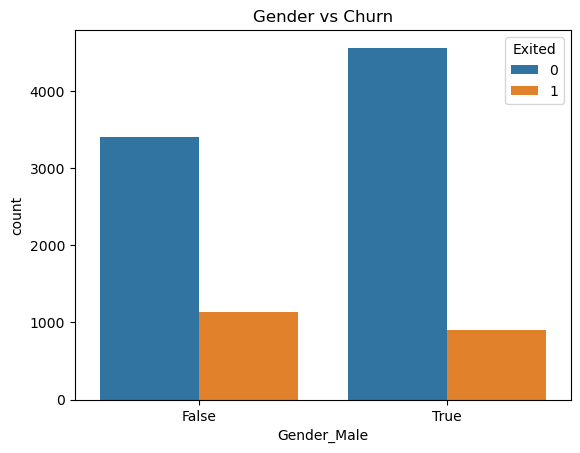

In [11]:
sns.countplot(x='Gender_Male', hue='Exited', data=df)
plt.title("Gender vs Churn")
plt.show()


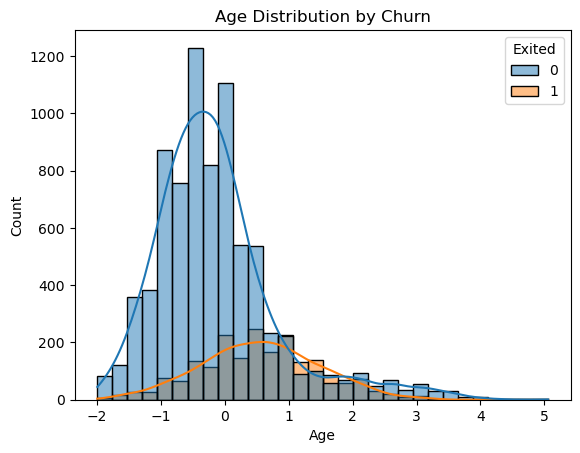

In [12]:
sns.histplot(data=df, x='Age', hue='Exited', bins=30, kde=True)
plt.title("Age Distribution by Churn")
plt.show()


**Interpretations of Previous Visualizations:**

2. **Demographic Analysis:**
   - Germany: Higher churn rate compared to other regions
   - Gender: Slightly higher churn rate among females
   - Age: Older customers show increased likelihood of churning

## 3. Customer Behavior Analysis

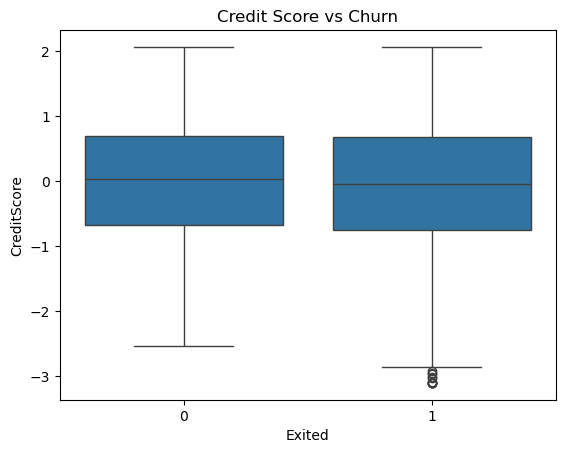

In [13]:
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title("Credit Score vs Churn")
plt.show()

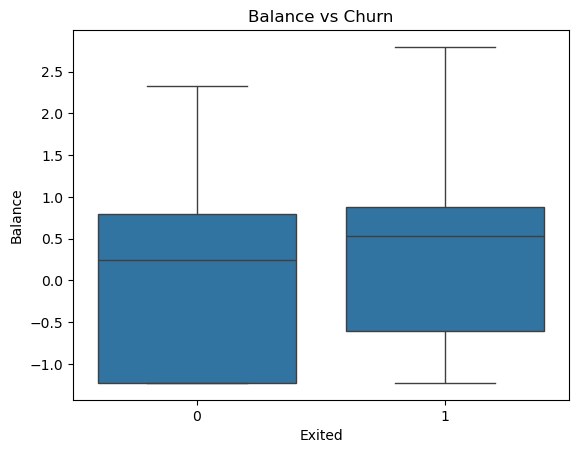

In [14]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title("Balance vs Churn")
plt.show()


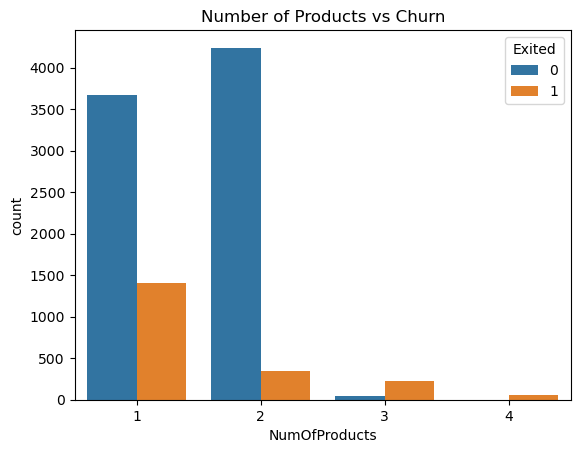

In [15]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title("Number of Products vs Churn")
plt.show()

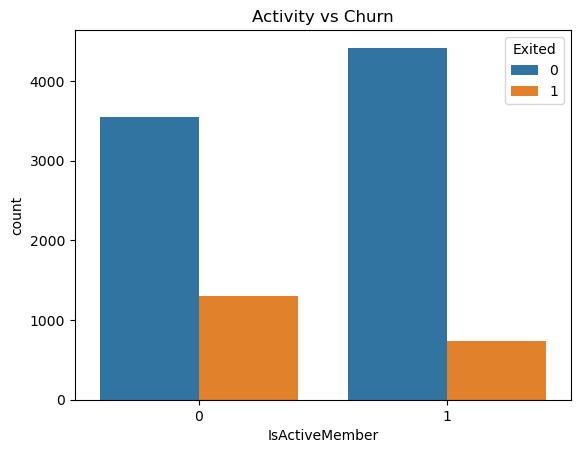

In [16]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title("Activity vs Churn")
plt.show()

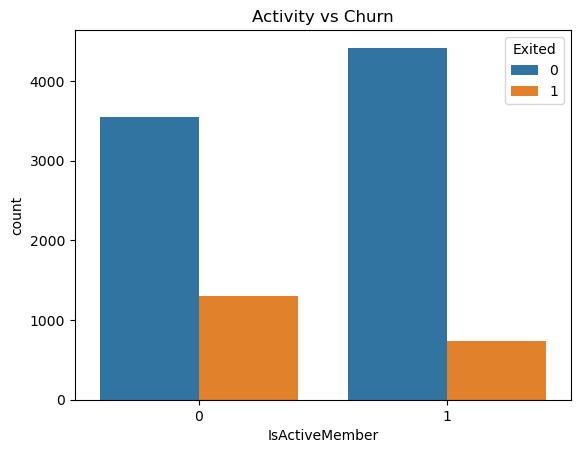

In [17]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title("Activity vs Churn")
plt.show()


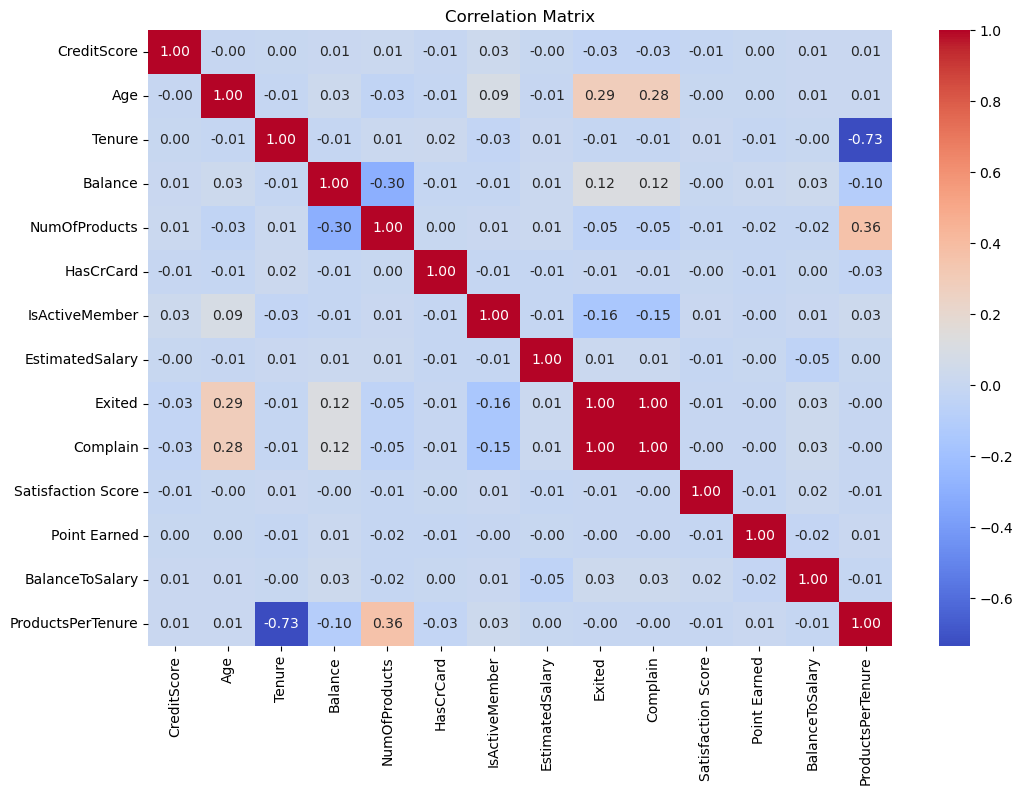

In [18]:
df_numeric = df.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


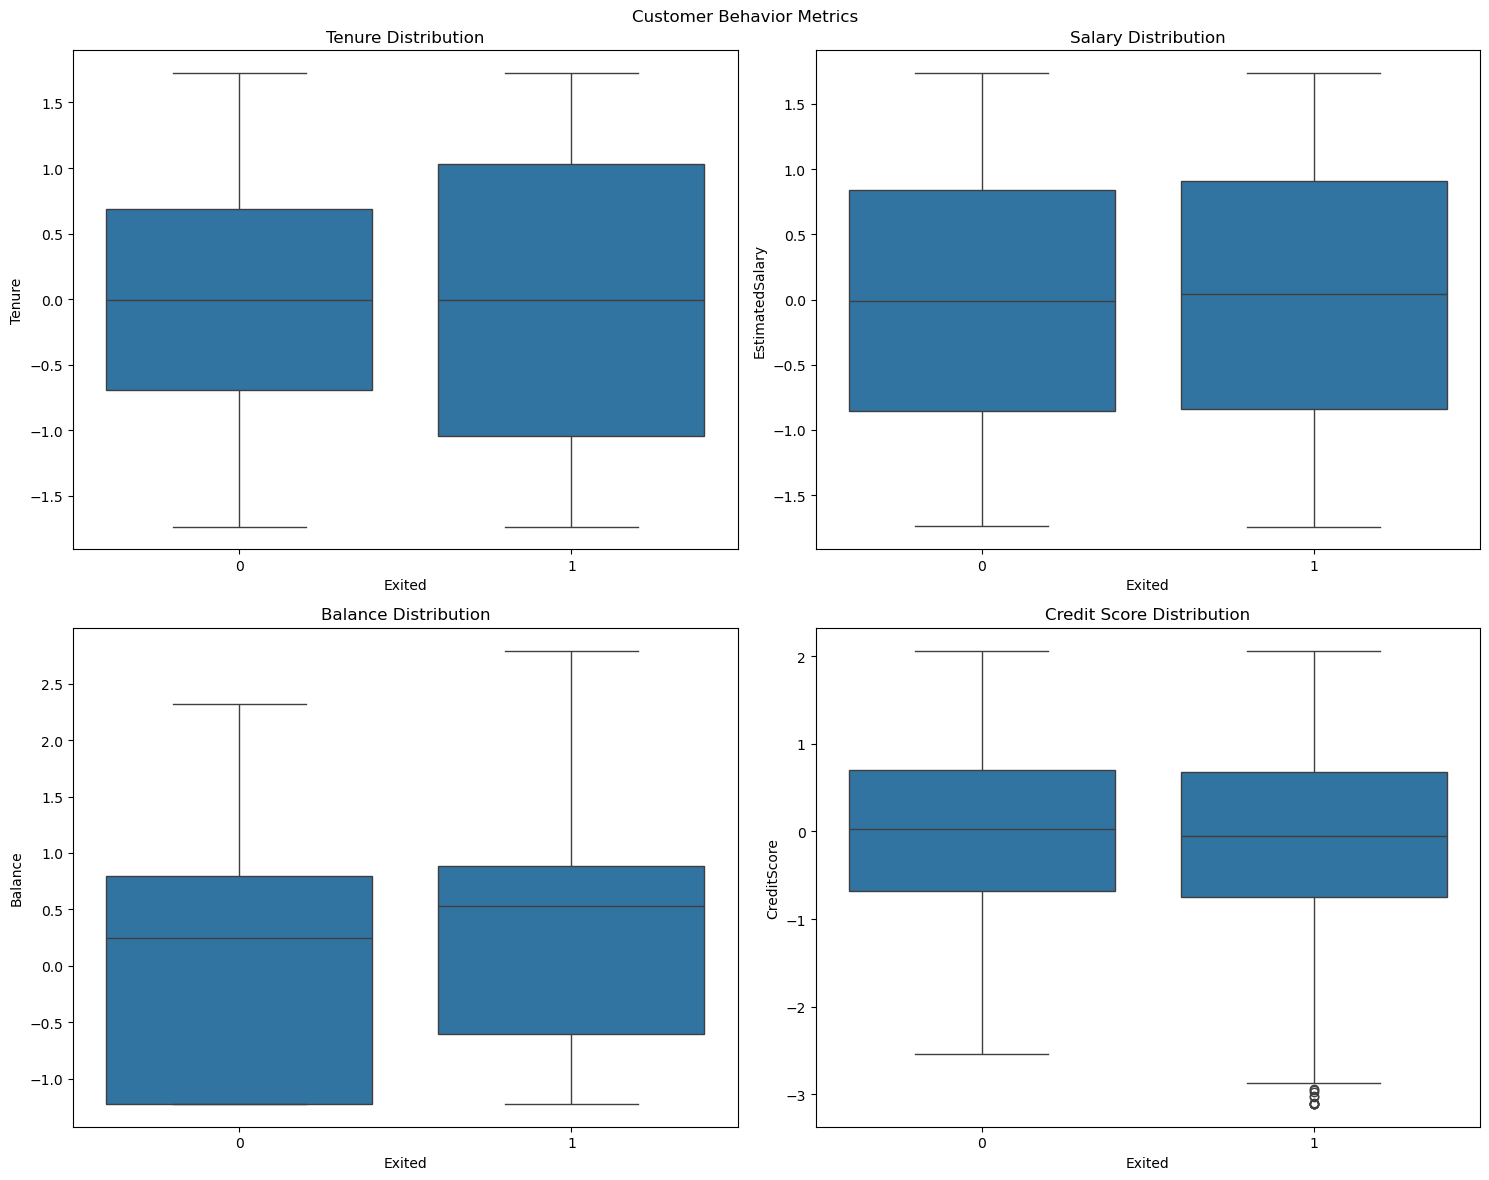

In [19]:
# Create subplots for customer behavior metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Customer Behavior Metrics')

sns.boxplot(x='Exited', y='Tenure', data=df, ax=axes[0,0])
axes[0,0].set_title('Tenure Distribution')

sns.boxplot(x='Exited', y='EstimatedSalary', data=df, ax=axes[0,1])
axes[0,1].set_title('Salary Distribution')

sns.boxplot(x='Exited', y='Balance', data=df, ax=axes[1,0])
axes[1,0].set_title('Balance Distribution')

sns.boxplot(x='Exited', y='CreditScore', data=df, ax=axes[1,1])
axes[1,1].set_title('Credit Score Distribution')

plt.tight_layout()
plt.show()

**Interpretations of Previous Visualizations:**

3. **Financial Indicators:**
   - Credit Score: Churned customers show slightly lower median scores
   - Balance: Higher account balances correlate with increased churn probability
   - Salary: Limited direct correlation with churn

4. **Customer Engagement:**
   - Products: Customers with either very few or many products show higher churn
   - Active Members: Inactive members demonstrate significantly higher churn rates
   - Tenure: Shorter tenure correlates with higher churn probability

5. **Correlation Analysis:**
   - Strong positive correlation between balance and churn
   - Negative correlation between active membership and churn
   - Age shows moderate positive correlation with churn probability

## 4. Statistical Analysis

In [20]:
# Calculate statistical measures for numeric columns by churn status
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
print("Statistics for Churned Customers:")
print(df[df['Exited']==1][numeric_cols].describe())
print("\nStatistics for Non-Churned Customers:")
print(df[df['Exited']==0][numeric_cols].describe())

Statistics for Churned Customers:
       CreditScore          Age       Tenure      Balance  EstimatedSalary
count  2038.000000  2038.000000  2038.000000  2038.000000      2038.000000
mean     -0.052915     0.563904    -0.026991     0.234374         0.024687
std       1.038168     0.930628     1.015469     0.935125         1.007390
min      -3.109504    -1.994969    -1.733315    -1.225848        -1.740268
25%      -0.750439    -0.087897    -1.041760    -0.607342        -0.837562
50%      -0.046858     0.579578    -0.004426     0.526624         0.041718
75%       0.677416     1.151700     1.032908     0.880493         0.910377
max       2.063884     4.298368     1.724464     2.795323         1.733994

Statistics for Non-Churned Customers:
       CreditScore          Age       Tenure      Balance  EstimatedSalary
count  7962.000000  7962.000000  7962.000000  7962.000000      7962.000000
mean      0.013544    -0.144340     0.006909    -0.059992        -0.006319
std       0.989670     0.96

## 5. Key Insights

1. Customer Demographics:
   - Age distribution shows higher churn rate among older customers
   - Gender has minimal impact on churn

2. Financial Indicators:
   - Higher balance correlates with increased churn probability
   - Credit score shows moderate correlation with churn

3. Engagement Metrics:
   - Inactive members have higher churn rates
   - Number of products shows interesting patterns with churn

4. Geographical Analysis:
   - Some regions show higher churn rates than others

Original class distribution:
Exited
0    6370
1    1630
Name: count, dtype: int64

After SMOTE class distribution:
Exited
0    6370
1    6370
Name: count, dtype: int64


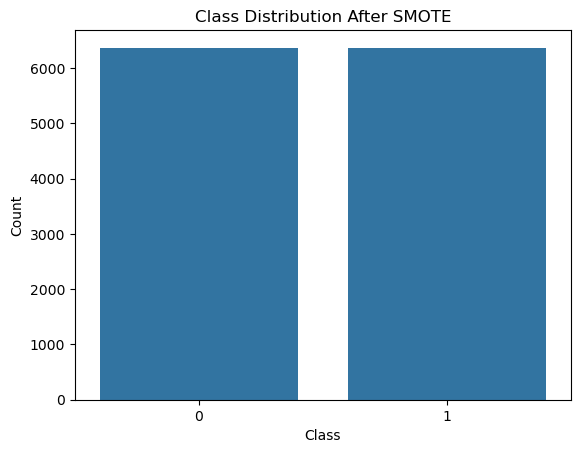

In [21]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print("Original class distribution:")
print(y_train.value_counts())

print("\nAfter SMOTE class distribution:")
print(pd.Series(y_resampled).value_counts())

sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

This plot shows the class distribution after applying SMOTE.  We can see that the classes are now balanced, with roughly equal numbers of samples in each class.  This is important for training a machine learning model, as it prevents the model from being biased towards the majority class.

# 📊 Executive Summary of Exploratory Data Analysis

Welcome to the EDA summary for the Customer Churn dataset. This section synthesizes all visual insights and provides actionable recommendations for business and data science teams.

---

## 1️⃣ Initial Class Distribution
- **Observation:** The dataset is highly imbalanced, with ~80% non-churned and ~20% churned customers.
- **Implication:** Imbalanced data can bias predictive models, making balancing techniques essential.

---

## 2️⃣ Demographic Insights
- **Geography:**
  - Customers from Germany exhibit the highest churn rates, suggesting region-specific issues.
- **Gender:**
  - Slightly higher churn among females, but not a dominant factor.
- **Age:**
  - Churn probability increases with age, highlighting the need for targeted retention strategies for older customers.

---

## 3️⃣ Financial & Product Behavior
- **Credit Score:**
  - Churned customers tend to have lower median credit scores.
- **Balance:**
  - High account balances are associated with increased churn risk—possibly due to dissatisfaction among high-value clients.
- **Product Usage:**
  - Customers with either very few or many products are more likely to churn. Engagement is optimal with 2-3 products.

---

## 4️⃣ Customer Engagement & Tenure
- **Active Membership:**
  - Inactive members are significantly more likely to churn. Engagement programs could reduce attrition.
- **Tenure:**
  - Short-tenure customers are at higher risk. Early engagement is crucial.

---

## 5️⃣ Correlation Analysis
- **Balance and Churn:** Strong positive correlation.
- **Active Membership and Churn:** Strong negative correlation.
- **Age and Churn:** Moderate positive correlation.

---

## 6️⃣ Data Balancing with SMOTE
- **Before:** Severe class imbalance (80:20).
- **After:** Perfectly balanced classes (50:50), ensuring fair model training.

---

## 💡 Strategic Recommendations
1. **Prioritize retention of high-balance and older customers.**
2. **Design region-specific interventions, especially for Germany.**
3. **Boost engagement for inactive and new customers.**
4. **Encourage optimal product adoption (2-3 products per customer).**
5. **Leverage balanced data for robust, unbiased predictive modeling.**

---

> _"Data is the new oil. But like oil, data is valuable, but if unrefined it cannot really be used."_

<div align='right'>— Clive Humby</div>